# Introducción a las RRNN con Keras
#### UD4. Redes Neuronales
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Toma como base el siguiente [tutorial oficial de Keras](https://keras.io/examples/vision/mnist_convnet/) de François Chollet y crea una red neuronal simple en lugar de una convolucional.

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
%matplotlib inline

# 1. Importación dataset MNIST

1.1. Carga el dataset de ejemplo MNIST separando el conjunto de entrenamiento del de pruebas.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# 2. EDA & Visual EDA

2.1. Comprueba la forma y dimensiones de las imágenes importadas.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2.2. Calcula el ancho, alto y total de pixeles de cada imagen.

In [ ]:
print('alto:' + str(len(X_train[0])))
print('ancho:' + str(len(X_train[0][0])))

alto:28
ancho:28


2.3. Muestra algunas de las imágenes cargadas y comprueba que se ven correctamente.
Para mostrar varias, puedes usar:
* plt.subplot(x, y, i) y
* plt.imshow()

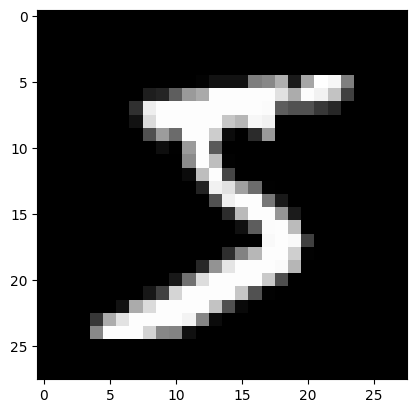

In [ ]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')

# 3. Preparación del dataset para la Red Neuronal

3.1. Convierte los datos a coma flotante ‘float32’.

In [ ]:
float_X_train = X_train.astype("float32")
float_X_test = X_test.astype("float32")
float_y_train = y_train.astype("float32")
float_y_test = y_test.astype("float32")

3.2. Transforma las imágenes para que todos sus píxeles se encuentren en `[0, 1]`

In [ ]:
normalized_X_train = float_X_train / 255
normalized_X_test = float_X_test / 255

3.3. Redimensiona/reacondiciona las dimensiones de las imágenes para que tengan las dimensiones que la red neuronal puede procesar.

In [ ]:
input_array_size = len(normalized_X_train[0]) * len(normalized_X_train[0][0]) # Tamaño del array al aplanar cada matriz de píxeles.
print(input_array_size)

final_X_train = normalized_X_train.reshape(normalized_X_train.shape[0],input_array_size)
print(final_X_train.shape)
final_X_test = X_test.reshape(X_test.shape[0],input_array_size)
print(final_X_test.shape)

784
(60000, 784)
(10000, 784)


3.4. Calcula el número de clases de que dispone el conjunto de datos.

In [ ]:
labels = np.unique(float_y_train)
labels

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

3.5. Convierte a categóricas las etiquetas del conjunto de entrenamiento (y_train) y del conjunto de test (y_test).

In [ ]:
final_y_train = tf.keras.utils.to_categorical(float_y_train, len(labels))
final_y_test = tf.keras.utils.to_categorical(float_y_test, len(labels))
print(final_y_train.shape)
print(final_y_test.shape)

(60000, 10)
(10000, 10)


# 4. Creación de la Red Neuronal

4.2. Inserta una primera capa con las siguientes características:
* Que contenga 1000 neuronas
* Que acepte una entrada igual al número de píxeles de las imágenes que va a procesar
* Que use `Relu` como función de activación

4.3. Construye la capa de salida. Usa `softmax` como función de activación

# 5. Entrenamiento
5.1. Compila el modelo creado:
* Usa categorical crossentropy como función de pérdida
* Usa `adam` como optimizador
* Usa la precisión como métrica

5.2. Comprueba la configuración de la RN antes creada

5.3. Entrena el modelo anterior usando la información del conjunto de datos de entrenamiento y el de test para validar la evolución y calidad del aprendizaje. Usa 5 épocas y un tamaño de batch de 1024 en cada pasada. Indica verbose 1, para que muestre la información del proceso.

# 6. Visualización

6.1. Muestra gráficamente la evolución de la precisión del modelo.

6.2. Muestra gráficamente la evolución de la función de pérdida.

# 7. Re-entrenamiento con nuevos parámetros


7.1. Entrena el modelo usando ahora los parámetros siguientes
* validation_split = 0.1, epochs=15, batch_size=4
* validation_split = 0.1, epochs=50, batch_size=1024

7.2. Muestra gráficamente la evolución de la precisión y función de pérdida del modelo recien entrenado. Extrae conclusiones.

# Opcional: ConvNet
Revisa el tutorial y cambia tu compilación para crear un red neuronal convolucional.
